           0                                 4    2       5
0    dynamic  tensor(20.8802, device='cuda:2')    5  0.0898
1    dynamic  tensor(20.5136, device='cuda:1')    5  0.0662
2    dynamic  tensor(20.8332, device='cuda:1')    5  0.1578
3    dynamic  tensor(20.2578, device='cuda:2')    5  0.1140
4    dynamic  tensor(20.5376, device='cuda:1')    5  0.1184
..       ...                               ...  ...     ...
219    total  tensor(15.7550, device='cuda:1')  500  0.3124
220    total   tensor(9.7382, device='cuda:2')    5  0.0434
221    total  tensor(15.4426, device='cuda:2')  500  0.3116
222    total  tensor(16.7542, device='cuda:3')  500  0.3466
223    total   tensor(8.7098, device='cuda:3')    5  0.0550

[224 rows x 4 columns]
   vison_layer      R1
0            1     0.0
2            2  0.0008
4            3  0.0014
6            4  0.0016
8            5   0.001
10           7  0.0024
12           8   0.002
14           9  0.0016
16          10   0.002
18          11  0.0044
20 

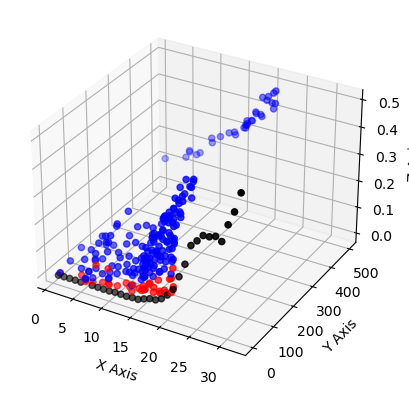

In [45]:
import pandas as pd
import re
from pyecharts.charts import Scatter3D
from pyecharts import options as opts
import asyncio
from aiohttp import TCPConnector, ClientSession

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read CSV file
file_path = '../data/end_to_end_lora_N_K_S_COCO_origin.csv'
df = pd.read_csv(file_path, header=None)

baseline_path = '../data/test_coco_zeroshot_origin.csv'
df_baseline = pd.read_csv(baseline_path)

# Extract relevant columns
df_filtered = df.iloc[:, [0, 4, 2, 5]].copy()
df_baseline_filtered = df_baseline.iloc[0::2, [0, 1]].copy()

# Convert tensor values to float
df_filtered.iloc[:, 1] = df_filtered.iloc[:, 1].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[0]))

# Extract columns
types = df_filtered.iloc[:, 0].values
tensor_values = df_filtered.iloc[:, 1].values
Q = df_filtered.iloc[:, 2].values
acc = df_filtered.iloc[:, 3].values

# Prepare data
data = []

for i in range(len(types)):
    color = 'red' if types[i] == 'dynamic' else 'blue'
    data.append([tensor_values[i], Q[i], acc[i], color])


print(data)
# Extract baseline values
types = 'baseline'
tensor_values = df_baseline_filtered.iloc[:, 0].values
Q = 0.67
acc = df_baseline_filtered.iloc[:, 1].values

for i in range(tensor_values.shape[0]):
    color = 'black'
    data.append([tensor_values[i], Q, acc[i], color])
print(data)

# 将数据分解为x, y, z轴和颜色
x = [float(item[0]) for item in data]
y = [float(item[1]) for item in data]
z = [float(item[2]) for item in data]
colors = [item[3] for item in data]

# 创建图形和三维轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 在三维轴上绘制散点图
ax.scatter(x, y, z, color=colors)

# 设置轴标签
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# 显示图形
plt.show()

In [57]:
import pandas as pd
import re
import plotly.express as px

# 读取 origin 数据
file_path = '../data/end_to_end_lora_N_K_S_COCO_origin.csv'
df = pd.read_csv(file_path)

# 提取并转换数据
df['Tensor_Value'] = df.iloc[:, 4].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[0]))
df_filtered = df[['Tensor_Value', df.columns[2], df.columns[5], df.columns[0]]].copy()
df_filtered.columns = ['Tensor', 'Q', 'Accuracy', 'Type']

# 根据类型动态分配颜色
df_filtered['Type'] = df_filtered['Type'].apply(lambda x: 'Dynamic' if x == 'dynamic' else 'Static')


# 读取 Baseline 数据
baseline_path = '../data/test_coco_zeroshot_origin.csv'
df_baseline = pd.read_csv(baseline_path)
df_baseline_filtered = df_baseline.iloc[0::2, [0, 1]].copy()

# 创建Baseline DataFrame
df_baseline_filtered.columns = ['Tensor', 'Accuracy']
df_baseline_filtered['Q'] = 0.67  # 假设 Baseline 的 Q 值
df_baseline_filtered['Type'] = 'Baseline'

# 合并数据
df_final = pd.concat([df_filtered, df_baseline_filtered], ignore_index=True)


# 读取 LoRa 数据
file_path = '../data/end_to_end_lora_N_K_S_COCO_true.csv'
df = pd.read_csv(file_path)

# 提取并转换数据
df['Tensor_Value'] = df.iloc[:, 4].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[0]))
df_lora_filtered = df[['Tensor_Value', df.columns[2], df.columns[5], df.columns[0]]].copy()
df_lora_filtered.columns = ['Tensor', 'Q', 'Accuracy', 'Type']

# 根据类型动态分配颜色
df_lora_filtered['Type'] = df_lora_filtered['Type'].apply(lambda x: 'Dynamic-lora' if x == 'dynamic' else 'Static-lora')

# 合并数据
df_final = pd.concat([df_final, df_lora_filtered], ignore_index=True)

# 创建3D散点图
fig = px.scatter_3d(df_final, x='Tensor', y='Q', z='Accuracy', color='Type',
                    labels={'Tensor': 'Avg. Layers', 'Q': 'Query cost', 'Accuracy': 'R@1'},
                    title='3D Scatter Plot of E2E exps',
                    color_discrete_map={'Dynamic': 'red', 'Static': 'blue', 'Baseline': 'black', 'Dynamic-lora': 'green', 'Static-lora': 'yellow'})
# 设置数据点大小
fig.update_traces(marker=dict(size=2))  # 这里的数字可以根据您的需求调整，数值越小点越小
# 显示图表
fig.show()


In [58]:
import pandas as pd
import re
import plotly.express as px

# 读取 origin 数据
file_path = '../data/end_to_end_lora_N_K_S_COCO_origin.csv'
df = pd.read_csv(file_path)

# 提取并转换数据
df['Tensor_Value'] = df.iloc[:, 4].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[0]))
df_filtered = df[['Tensor_Value', df.columns[2], df.columns[6], df.columns[0]]].copy()
df_filtered.columns = ['Tensor', 'Q', 'Accuracy', 'Type']

# 根据类型动态分配颜色
df_filtered['Type'] = df_filtered['Type'].apply(lambda x: 'Dynamic' if x == 'dynamic' else 'Static')


# 读取 Baseline 数据
baseline_path = '../data/test_coco_zeroshot_origin.csv'
df_baseline = pd.read_csv(baseline_path)
df_baseline_filtered = df_baseline.iloc[0::2, [0, 2]].copy()

# 创建Baseline DataFrame
df_baseline_filtered.columns = ['Tensor', 'Accuracy']
df_baseline_filtered['Q'] = 0.67  # 假设 Baseline 的 Q 值
df_baseline_filtered['Type'] = 'Baseline'

# 合并数据
df_final = pd.concat([df_filtered, df_baseline_filtered], ignore_index=True)


# 读取 LoRa 数据
file_path = '../data/end_to_end_lora_N_K_S_COCO_true.csv'
df = pd.read_csv(file_path)

# 提取并转换数据
df['Tensor_Value'] = df.iloc[:, 4].apply(lambda x: float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[0]))
df_lora_filtered = df[['Tensor_Value', df.columns[2], df.columns[6], df.columns[0]]].copy()
df_lora_filtered.columns = ['Tensor', 'Q', 'Accuracy', 'Type']

# 根据类型动态分配颜色
df_lora_filtered['Type'] = df_lora_filtered['Type'].apply(lambda x: 'Dynamic-lora' if x == 'dynamic' else 'Static-lora')

# 合并数据
df_final = pd.concat([df_final, df_lora_filtered], ignore_index=True)

# 创建3D散点图
fig = px.scatter_3d(df_final, x='Tensor', y='Q', z='Accuracy', color='Type',
                    labels={'Tensor': 'Avg. Layers', 'Q': 'Query cost', 'Accuracy': 'R@5'},
                    title='3D Scatter Plot of E2E exps',
                    color_discrete_map={'Dynamic': 'red', 'Static': 'blue', 'Baseline': 'black', 'Dynamic-lora': 'green', 'Static-lora': 'yellow'})
# 设置数据点大小
fig.update_traces(marker=dict(size=2))  # 这里的数字可以根据您的需求调整，数值越小点越小
# 显示图表
fig.show()
